### Trotterization of hamiltoian

U = $ \alpha Z + \beta X $

In [1]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt


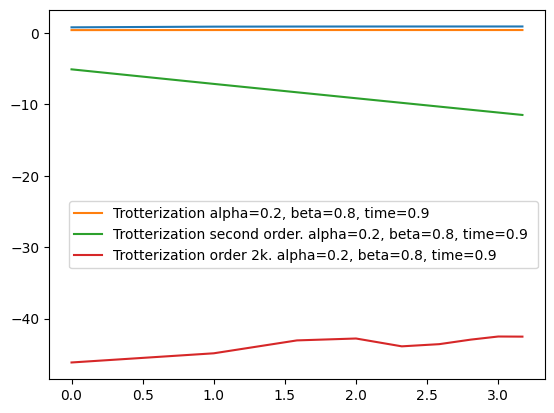

In [2]:
dev = qml.device("default.qubit", wires=1)
def exact_result_XandZ(alpha, beta, time):
    root = np.sqrt(alpha**2 + beta**2)
    c_0 = np.cos(root*time) - (alpha/root)*np.sin(root*time)*1.j
    c_1 = -(beta/root)*np.sin(root*time)*1.j
    return np.array([c_0, c_1])
    
@qml.qnode(dev)
def trotter_XandZ(alpha, beta, time, n):
    for i in range(n):
        qml.PauliRot(-2*beta*time/n, 'X',  wires=[0])
        qml.RZ(-2*alpha*time/n, wires=0)

    return qml.state()

def trotter_error_XandZ(alpha, beta, time, n):
    diff = np.abs(trotter_XandZ(alpha, beta, time, n) - exact_result_XandZ(alpha, beta, time))
    return np.sqrt(sum(diff*diff))

e = []
nlog = []

for n in range(1,10):
    e.append(np.log2(trotter_error_XandZ(1,1,0.9,n)))
    nlog.append(np.log2(n))

plt.plot(nlog, e)

e1 = []
nlog1 = []

for n in range(1,10):
    e1.append(np.log2(trotter_error_XandZ(0.2,0.8,0.9,n)))
    nlog1.append(np.log2(n))

plt.plot(nlog1, e1, label="Trotterization alpha=0.2, beta=0.8, time=0.9 ")

@qml.qnode(dev)
def trotter_2_XandZ(alpha, beta, time, n):
    for i in range(n):
        qml.RZ(2*alpha*time/(2*n), wires=0)
        qml.PauliRot(2*beta*time/(2*n), 'X',  wires=0)
        qml.PauliRot(2*beta*time/(2*n), 'X',  wires=0)
        qml.RZ(2*alpha*time/(2*n), wires=0)
    return qml.state()

def trotter_2_error_XandZ(alpha, beta, time, n):
    diff = np.abs(trotter_2_XandZ(alpha, beta, time, n) - exact_result_XandZ(alpha, beta, time))
    return np.sqrt(sum(diff*diff))

e2 = []
nlog2 = []

for n in range(1,10):
    e2.append(np.log2(trotter_2_error_XandZ(0.2,0.8,0.9,n)))
    nlog2.append(np.log2(n))

plt.plot(nlog2, e2, label="Trotterization second order. alpha=0.2, beta=0.8, time=0.9 ")

@qml.qnode(dev)
def trotter_k_XandZ(alpha, beta, time, n, k):
    def U(alpha, beta, time, n, k):
        if k == 1:
            qml.RZ(alpha*time/n, wires=[0])
            qml.RX(2*beta*time/n, wires=[0])
            qml.RZ(alpha*time/n, wires=[0])
        else:
            s = 1/(4 - 4 ** (1/(2*k-1)))
            U(alpha, beta, s*time, n, k-1)
            U(alpha, beta, s*time, n, k-1)
            U(alpha, beta, (1-4*s)*time, n, k-1)
            U(alpha, beta, s*time, n, k-1)
            U(alpha, beta, s*time, n, k-1)
    for _ in range(n):
        U(alpha, beta, time, n, k)
    return qml.state()

def trotter_k_error_XandZ(alpha, beta, time, n, k):
    diff = np.abs(trotter_k_XandZ(alpha, beta, time, n, k) - exact_result_XandZ(alpha, beta, time))
    return np.sqrt(sum(diff*diff))

e2 = []
nlog2 = []

for n in range(1,10):
    e2.append(np.log2(trotter_k_error_XandZ(0.2,0.8,0.9,n,5)))
    nlog2.append(np.log2(n))

plt.plot(nlog2, e2, label="Trotterization order 2k. alpha=0.2, beta=0.8, time=0.9 ")

plt.legend(bbox_to_anchor=(1.0,0.5))
plt.show()
